In [114]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as spi


In [115]:
m1=-3
s1=2
m2=-2
s2=0.6

In [116]:

# функція щільності ймовірності ознак x:
def prob_density_fx (x,m,s):
    return(1/(np.sqrt(2*np.pi)*s))*np.exp((-1)*(x-m)**2)/(2*s**2)

In [129]:
# визначимо межі діапазону за правилом «трьох сигм», згідно з яким випадкова величина x,
# розподілена за нормальним законом, знаходиться в інтервалі значень m ± 3σ з імовірністю більше 0,997

x1_min=m1-3*s1
x1_max=m1+3*s1
x2_min=m2-3*s2
x2_max=m2+3*s2

print(f"x1_min={x1_min}, x1_max={x1_max}")
print(f"x2_min={x2_min}, x2_max={x2_max}")


x1_min=-9, x1_max=3
x2_min=-3.8, x2_max=-0.20000000000000018


In [142]:
#Визначимо нижню і верхню межі значень параметра x:
x_min=min(x1_min,x2_min)
x_max=max(x1_max,x2_max)

print(f"x_min = {x_min}\nx_max = {x_max}")

x_min = -9
x_max = 3


In [143]:
#Для заданих даних xmin = -9, xmax = 3. Розділимо інтервал [xmin, xmax] на
# (N - 1)=199 частини і визначимо координати точок поділу:
# розділяємо інтервал[-9,3] на 199 точок і вираховуємо значення в цих точках:
N=200 
# масив точок інтервалу
xi=[]
# Сформуємо масиви значень умовних по класу щільності ймовірності fx1 і fx2, відповідні точкам xi:
fx1=[]
fx2=[]
for i in range(N):
    xi_value = x_min + ((x_max - x_min) / (N - 1)) * i
    xi.append(xi_value)

print(f"xi={xi}")

    
fx1=[prob_density_fx(xi[i], m1,s1) for i in range (N) ] 
fx2=[prob_density_fx(xi[i], m2,s2) for i in range (N) ]

print(f"fx1 = {fx1}\nfx2 = {fx2}")

xi=[-9.0, -8.93969849246231, -8.879396984924623, -8.819095477386934, -8.758793969849247, -8.698492462311558, -8.638190954773869, -8.577889447236181, -8.517587939698492, -8.457286432160805, -8.396984924623116, -8.336683417085426, -8.27638190954774, -8.21608040201005, -8.155778894472363, -8.095477386934673, -8.035175879396984, -7.974874371859297, -7.914572864321608, -7.8542713567839195, -7.793969849246231, -7.733668341708543, -7.673366834170855, -7.613065326633166, -7.552763819095477, -7.492462311557789, -7.432160804020101, -7.371859296482413, -7.311557788944723, -7.251256281407035, -7.190954773869347, -7.130653266331659, -7.07035175879397, -7.010050251256281, -6.949748743718593, -6.889447236180905, -6.829145728643216, -6.768844221105528, -6.708542713567839, -6.648241206030151, -6.5879396984924625, -6.527638190954773, -6.467336683417086, -6.407035175879397, -6.346733668341709, -6.28643216080402, -6.226130653266331, -6.165829145728644, -6.105527638190955, -6.045226130653266, -5.9849246231

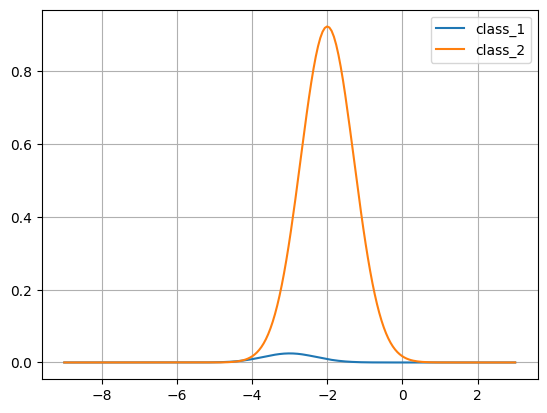

In [144]:
# Побудуємо графіки умовних щільностей ймовірності :

fig, ax=plt.subplots()

ax.plot( xi, fx1, label="class_1")
ax.plot( xi, fx2, label="class_2")

ax.grid()
ax.legend()
plt.show()


In [145]:
# Для визначення порогів прийняття рішення за критерієм 
# максимальноїправдоподібності потрібно вирішити рівняння:
d1=s1**2
d2=s2**2
a=d2-d1
b=2*m2*d1-2*(m1*d2)
c=d2*(m1**2)-d1*(m2**2)-2*d1*d2*np.log(s2/s1)
print(f"Спрощення рівняння за допомогою дод.зміних\n\nДодаткові зміни:\nd1 = {d1}\nd2 = {d2}\na = {a}\nb = {b}\nc = {c}")

# Обчислимо пороги прийняття рішення xg1 і xg2, xg1 <xg2:
print("\nОбчислимо пороги прийняття рішення xg1 і xg2, xg1 <xg2:")
xg1=(((-b)+(np.sqrt((b**2)-4*a*c)))/(2*a))
xg2=(((-b)-(np.sqrt((b**2)-4*a*c)))/(2*a))
print(f"Отримаємо:\nxg1 = {xg1}\nxg2 = {xg2}")


Спрощення рівняння за допомогою дод.зміних

Додаткові зміни:
d1 = 4
d2 = 0.36
a = -3.64
b = -13.84
c = -9.292558323541304

Обчислимо пороги прийняття рішення xg1 і xg2, xg1 <xg2:
Отримаємо:
xg1 = -2.931281600149864
xg2 = -0.8709162020479384


In [153]:

# print("в даному випадку xg1 і xg2 Є [-9,3]), то  упустимо  перевизначення меж x")

# if x_min > xg1:
#     x_min=xg1
# if x_max < xg2:
#     x_max=xg2

# print(f"\nNew_boards:[{round(x_min,2)};{x_max}]")


# new_fx1=[]
# new_fx2=[]

# for i in range(200):
#     new_fx1.append(prob_density_fx (xi[i],m1,s1))
#     new_fx2.append(prob_density_fx (xi[i],m2,s2))

# print(f"\nNew_points:\nfx1 = {new_fx1}\nfx2 = {new_fx2}")

в даному випадку xg1 і xg2 Є [-9,3]), то  упустимо  перевизначення меж x

Зобразимо на графіку отримані границі розділу між класами xg1 і xg2:


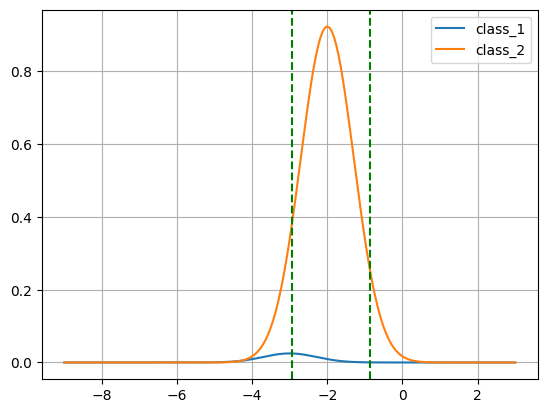

In [154]:
print("в даному випадку xg1 і xg2 Є [-9,3]), то  упустимо  перевизначення меж x")
print("\nЗобразимо на графіку отримані границі розділу між класами xg1 і xg2:")

fig, ax=plt.subplots()

ax.plot( xi, fx1, label="class_1")
ax.plot( xi, fx2, label="class_2")

ax.grid()
ax.legend()
# Plot vertical dashed lines at xg1 and xg2
ax.axvline(xg1, linestyle='--', color='green')
ax.axvline(xg2, linestyle='--', color='green')

plt.show()




In [147]:
#  Для оцінки ефективності вирішального правила (Критерій максимальної правдоподібності) розрахуємо теоретичні величини ймовірностей помилок розпізнавання.")

# Calculate p21
p21 = spi.quad(prob_density_fx, x_min, xg1, args=(m2, s2))[0] + spi.quad(prob_density_fx, xg2, x_max, args=(m2, s2))[0]
print(f"Імовірність віднести спостережуваний ознака до класу a1, коли він насправді належить класу a2:\np21={p21}")

# Calculate p12
p12 = spi.quad(prob_density_fx, xg1, xg2, args=(m1, s1))[0]

print(f"\nЙмовірність прийняття рішення на користь класу a2, коли в дійсності спостерігається клас a1:\np12={p12}")


Імовірність віднести спостережуваний ознака до класу a1, коли він насправді належить класу a2:
p21=0.24400599585972416

Ймовірність прийняття рішення на користь класу a2, коли в дійсності спостерігається клас a1:
p12=0.02032882064669853


In [156]:
p=1-0.5*(p21+p12)
print(f"Визначимо ймовірність правильного розпізнавання:\np= {p}")

Визначимо ймовірність правильного розпізнавання:
p= 0.8678325917467886


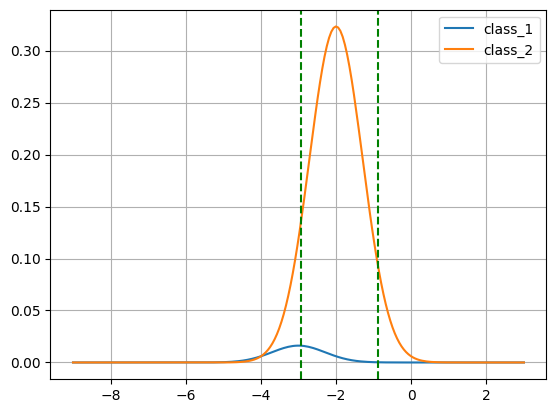

In [157]:
# Для побудови вирішального правила за критерієм максимальної апостеріорної ймовірності (перевищує апостеріорні ймовірності інших класів) задамо апріорні ймовірності p1 і p2 появи класів a1 і a2, p1 + p2 = 1:
p1=0.65
p2=0.35
# Побудуємо в інтервалі [x_min, x_max] графік щільностей повних ймовірностей появи класів a1 і a2 
fx1_01=[p1*prob_density_fx(xi[i],m1,s1) for i in range(N)]
fx2_01=[p2*prob_density_fx(xi[i],m2,s2) for i in range(N)]

fig, ax = plt.subplots()
ax.plot(xi,fx1_01,label="class_1")
ax.plot(xi,fx2_01,label="class_2")
ax.grid()
ax.legend()
# Plot vertical dashed lines at xg1 and xg2
ax.axvline(xg1, linestyle='--', color='green')
ax.axvline(xg2, linestyle='--', color='green')
plt.show()

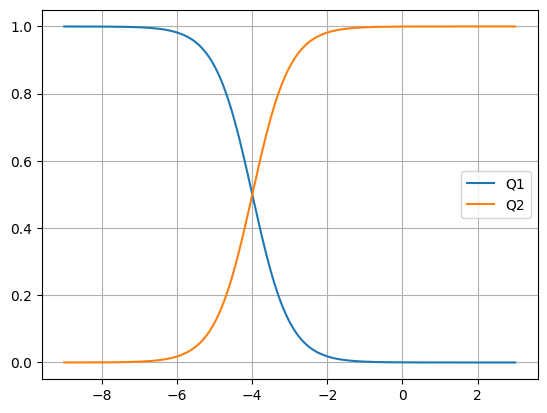

In [150]:
# Побудуємо графік апостеріорних ймовірностей класів a1 і a2 
q1=[fx1_01[i]/(fx1_01[i] + fx2_01[i]) for i in range(N)]
q2=[fx2_01[i]/(fx1_01[i] + fx2_01[i]) for i in range(N)]

fig, ax = plt.subplots()
ax.plot(xi,q1,label="Q1")
ax.plot(xi,q2,label="Q2")
ax.grid()
ax.legend()
plt.show()

In [151]:
# Для визначення порогів прийняття рішення про клас об'єкту за критерієм максимальної апостеріорної ймовірності, вирішимо квадратне рівняння
c=m1**2*d2-m2**2*d1-2*d1*d2*np.log(s2*p1/(s1*p2))
# Обчислимо пороги прийняття рішення xg1 і xg2, xg1 <xg2:
xg1_01=(-b + np.sqrt(b**2-4*a*c))/(2*a)
xg2_01=(-b - np.sqrt(b**2-4*a*c))/(2*a)
print(f"Отримані пороги:\nxg1_01= {xg1_01} \nxg2_01= {xg2_01}")

Отримані пороги:
xg1_01= -2.6570665787346526 
xg2_01= -1.1451312234631494


In [158]:
print("в даному випадку xg1_01 і xg2_01 Є [-9,3]), то  упустимо  перевизначення меж x")
# Розрахуємо теоретичні ймовірності помилок розпізнавання першого і другого роду
p21_01 = spi.quad(prob_density_fx, x_min, xg1_01, args=(m2, s2))[0] + spi.quad(prob_density_fx, xg2_01, x_max, args=(m2, s2))[0]

# Calculate p12
p12_01 = spi.quad(prob_density_fx, xg1_01, xg2_01, args=(m1, s1))[0]

print(f"\nЙмовірність НЕ віднести ознаку до класу_1, коли він є рівним={round(p12_01,2)}")
print(f"Ймовірність НЕ віднести ознаку до класу_2, коли він є рівним={round(p21_01,2)}")

# Імовірність правильного розпізнавання для випадку, коли апріорніймовірності класів відомі і p1 ≠ p2 ≠ 0.5:
p=1-0.5*(p12_01+p21_01)
print(f"Ймовірність правильного розподілу = {round(p,2)}")

в даному випадку xg1_01 і xg2_01 Є [-9,3]), то  упустимо  перевизначення меж x

Ймовірність НЕ віднести ознаку до класу_1, коли він є рівним=0.01
Ймовірність НЕ віднести ознаку до класу_2, коли він є рівним=0.47
Ймовірність правильного розподілу = 0.76
